### seaborn是matplotlib的封装 

In [52]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## 5种主题风格

### darkgrid、whitegrid、dark、white、ticks 

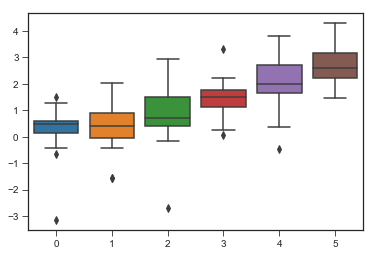

In [21]:
sns.set_style("whitegrid")
#若设置为sns.set_style("white")则没有刻度线
data=np.random.normal(size=(20,6))+np.arange(6)/2
#sns.set_style("ticks")加上标尺
sns.set_style("ticks")
#设置图距离坐标轴的距离
sns.despine(offset=4)
sns.boxplot(data=data)

### 当需要使用不同风格、画多个图时，可以用with域指定一种风格，with域外部为另外的风格 

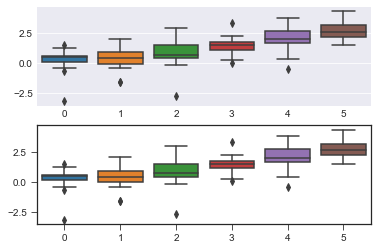

In [22]:
with sns.axes_style("darkgrid"):
    plt.subplot(211)
    sns.boxplot(data=data)
plt.subplot(212)
sns.boxplot(data=data)

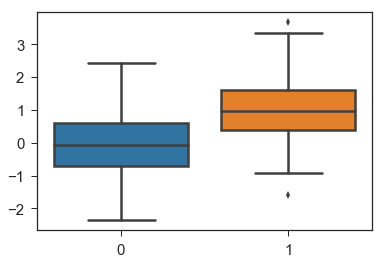

In [60]:
#指定画图大小等参数
sns.set_context("notebook",font_scale=1.5,rc={"lines.linewidth":2.5})
sns.boxplot(data=data)

##  5.1  调色板color_palette()

### 分类色板,12种默认循环主题颜色 

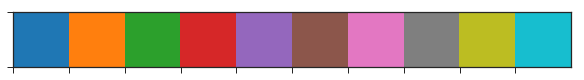

In [25]:
current_palette=sns.color_palette()
sns.palplot(current_palette)

### 圆形画板，平均划分颜色空间，常用hls 

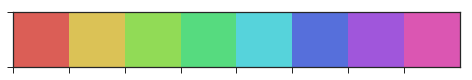

In [27]:
sns.palplot(sns.color_palette("hls",8))

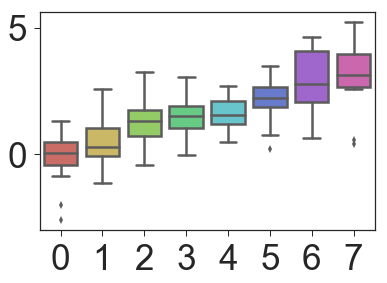

In [28]:
data=np.random.normal(size=(20,8))+np.arange(8)/2
sns.boxplot(data=data,palette=sns.color_palette("hls",8))

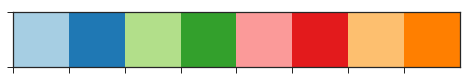

In [29]:
sns.palplot(sns.color_palette("Paired",8))

## 5.2 调色板颜色设置

### 使用xkcd颜色来命名颜色 

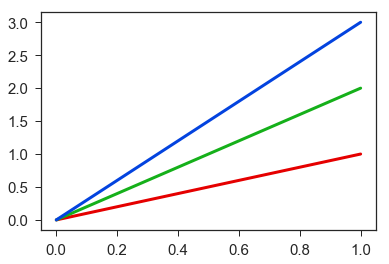

In [61]:
plt.plot([0,1],[0,1],sns.xkcd_rgb["red"],lw=3)
plt.plot([0,1],[0,2],sns.xkcd_rgb["green"],lw=3)
plt.plot([0,1],[0,3],sns.xkcd_rgb["blue"],lw=3)

### 连续色板（颜色首字母大写，加s） 

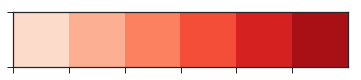

In [39]:
sns.palplot(sns.color_palette("Reds"))

### 如果想要翻转渐变，可以在面板名称中加一个_r后缀 

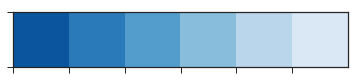

In [35]:
sns.palplot(sns.color_palette("Blues_r"))

### light_palette()和dark_palette()调用定制连续调色板

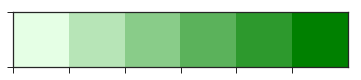

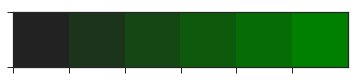

In [42]:
sns.palplot(sns.light_palette("green"))
sns.palplot(sns.dark_palette("green"))

## 5.3 单变量分析绘图(distplot直方图) 

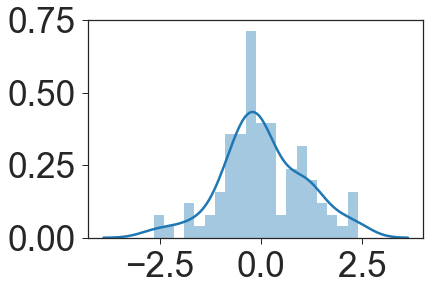

In [50]:
x=np.random.normal(size=100)
sns.distplot(x,bins=20)
#fit参数查看当前数据是否符合某统计指标

### 根据均值和协方差生成数据 

In [54]:
mean,cov=[0,1],[(1,.5),(.5,1)]
data=np.random.multivariate_normal(mean,cov,200)
df=pd.DataFrame(data,columns=["x","y"])
df.head(3)

,x,y
0,0.370757,0.941175
1,0.374622,2.312179
2,-2.347624,0.679420


### 观测两个变量之间的分布关系最好用散点图sns.jointplot 

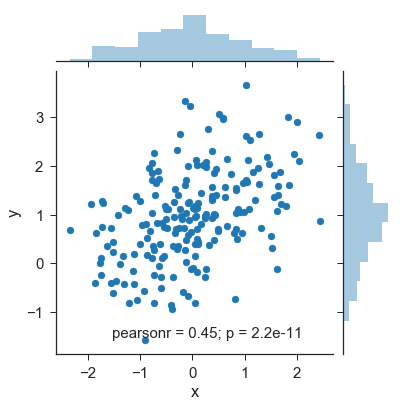

In [62]:
sns.jointplot(x="x",y="y",data=df)

### 对于大数据量的点，会发生很多重叠，可以用kind="hex"设置散点图，颜色深浅表示数据量大小

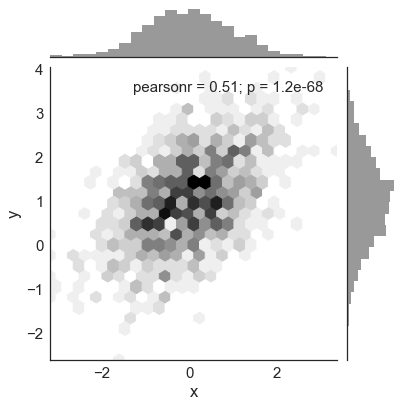

In [69]:
#先生成1000个点的数据
mean,cov=[0,1],[(1,.5),(.5,1)]
data=np.random.multivariate_normal(mean,cov,1000)
df=pd.DataFrame(data,columns=["x","y"])
with sns.axes_style("white"):
    sns.jointplot(x="x",y="y",kind="hex",color="k",data=df)

### seaborn的pairplot()方法会对多个特征之间两两进行分析，对角线为单个特征的情况，其他位置为两两之间

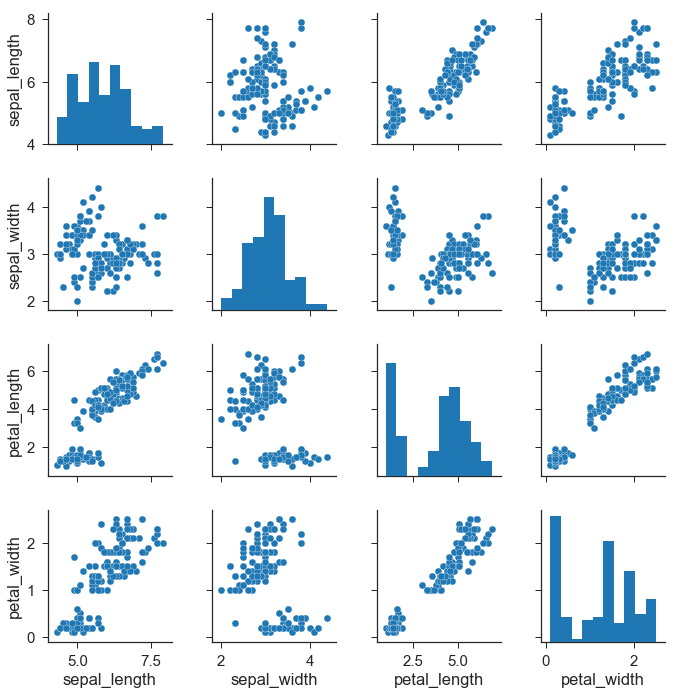

In [71]:
#使用seaborn的内置数据集iris，需连网状态下连接数据集
iris=sns.load_dataset("iris")
sns.pairplot(iris)

## 5.4 回归分析绘图 

In [72]:
#seaborn内置数据集tips
tips=sns.load_dataset("tips")
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


### sns.regplot()和sns.lmplot()都可以绘制回归关系，推荐用sns.regplot(),支持的数据集更多

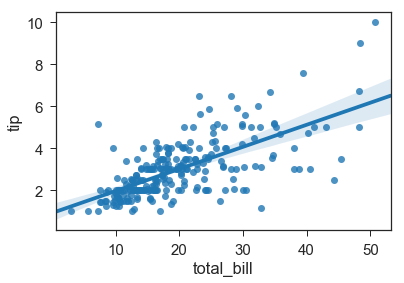

In [73]:
sns.regplot(x="total_bill",y="tip",data=tips)

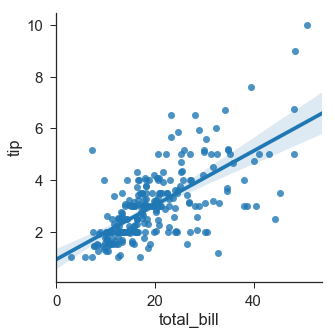

In [75]:
#sns.lmplot()画出的图跟sns.regplot()差不多，只是它支持一些更高级的内容
sns.lmplot(x="total_bill",y="tip",data=tips)

## 5.6  多变量分析绘图

In [80]:
sns.set(style="whitegrid",color_codes=True)
titanic=sns.load_dataset("titanic")
#上面已指定tips=sns.load_dataset("tips")
#上面已指定iris=sns.load_dataset("iris")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


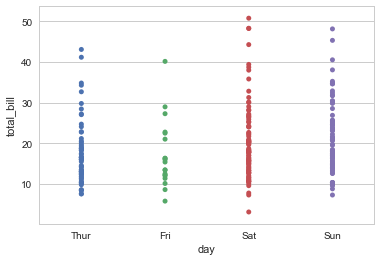

In [81]:
sns.stripplot(x="day",y="total_bill",data=tips)

### 用sns.stripplot()有一个缺点：对于数据重叠量较大的，无法观察到实际情况 ,可以添加属性jitter=True摆动数据

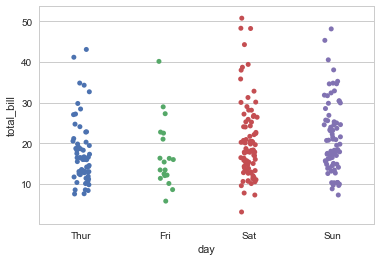

In [82]:
sns.stripplot(x="day",y="total_bill",data=tips,jitter=True)

### 树状图sns.swarmplot()，更加直观

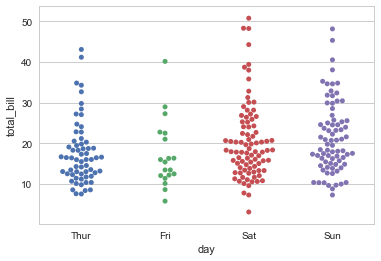

In [83]:
sns.swarmplot(x="day",y="total_bill",data=tips)

### 添加分类指标用hue="列名"

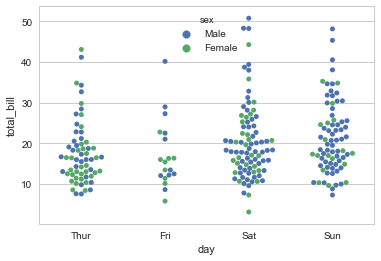

In [84]:
sns.swarmplot(x="day",y="total_bill",hue="sex",data=tips)

### 盒图sns.boxplot(),用于观察离群点

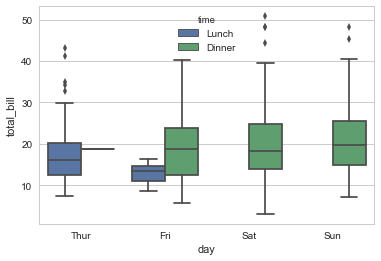

In [86]:
sns.boxplot(x="day",y="total_bill",hue="time",data=tips)

### 小提琴图sns.violinplot()

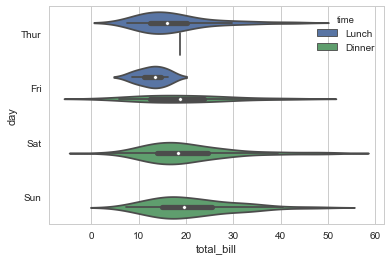

In [88]:
sns.violinplot(y="day",x="total_bill",hue="time",data=tips)

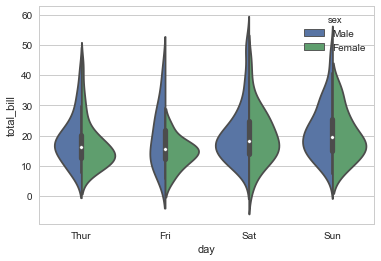

In [89]:
sns.violinplot(x="day",y="total_bill",hue="sex",data=tips,split=True)

## 5.7  分类属性绘图

### 条形图sns.barplot()

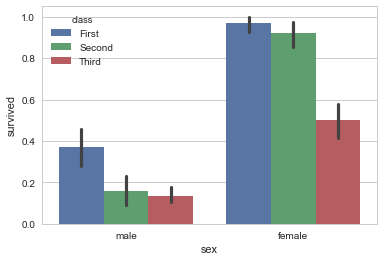

In [90]:
sns.barplot(x="sex",y="survived",hue="class",data=titanic)

### 点图sns.pointplot()可以更好地描述差异变化

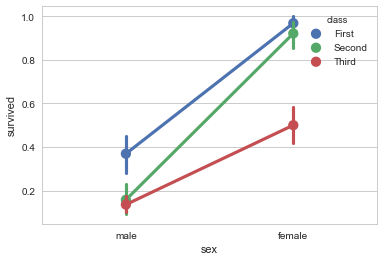

In [91]:
sns.pointplot(x="sex",y="survived",hue="class",data=titanic)

### 多层面板分类图sns.factorplot(),用属性kind指定绘图类型

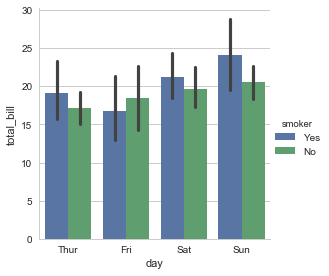

In [93]:
sns.factorplot(x="day",y="total_bill",hue="smoker",data=tips,kind="bar")

### 属性col指定按哪个维度分类画图，aspect指定长宽比

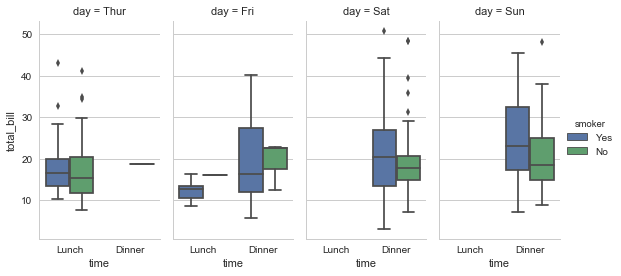

In [94]:
sns.factorplot(x="time",y="total_bill",hue="smoker",col="day",data=tips,kind="box",size=4,aspect=.5)

## 5.8 FacetGrid使用方法

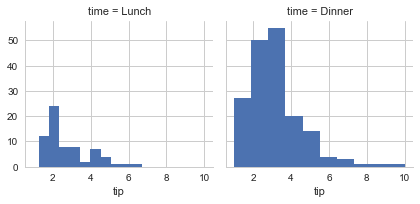

In [97]:
#先占位，还不做绘图
g=sns.FacetGrid(tips,col="time")
#用map指定绘图类型，及绘图数据
g.map(plt.hist,"tip")

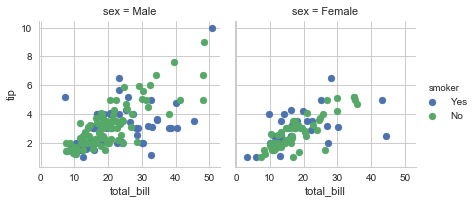

In [101]:
g=sns.FacetGrid(tips,col="sex",hue="smoker")
#参数alpha指定透明度
g.map(plt.scatter,"total_bill","tip",alpha=1)
#add_legend()指定hue="smoker"的说明项（即图例）
g.add_legend()

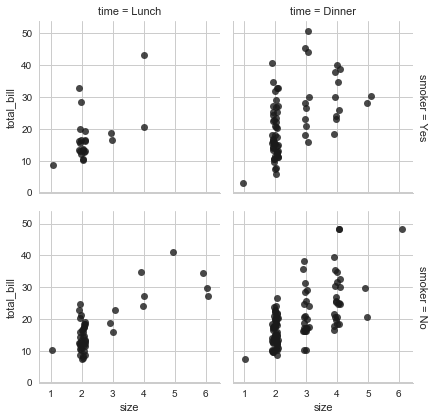

In [106]:
g=sns.FacetGrid(tips,row="smoker",col="time",margin_titles=True)
#用map指定绘图类型，及绘图数据
g.map(sns.regplot,"size","total_bill",color=".1",fit_reg=False,x_jitter=.1)

### 使用属性row_order=设置自己想要的顺序

### 另外 ，FacetGrid要求传入的数据为pandas的DataFrame格式，使用pandas.Categorical()

CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category')
------------------------------


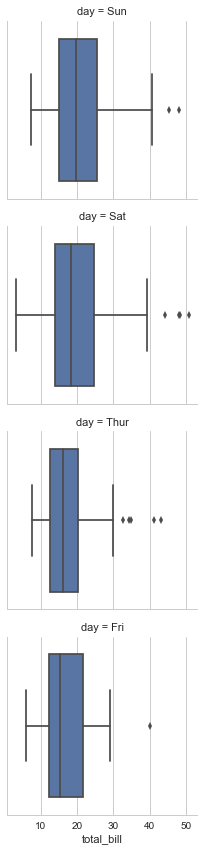

In [109]:
from pandas import Categorical
print(tips.day.value_counts().index)
print("--"*15)
#设置自己想要的顺序
order=Categorical(["Sun","Sat", "Thur", "Fri"])
g=sns.FacetGrid(tips,row="day",row_order=order)
g.map(sns.boxplot,"total_bill")

## 5.9 热度图绘制sns.heatmap()，常用于变量间的相关程度、相关性观察

### 注意：heatmap传入的数据为矩阵形式，可以用data.pivot(行，列，值)转换

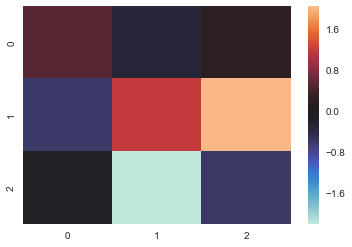

In [110]:
data=np.random.randn(3,3)
ax=sns.heatmap(data,center=0)
#另外，还可以设置参数vmin、vmax等

### 若想将具体值也放在图中，可以用annot=True设置

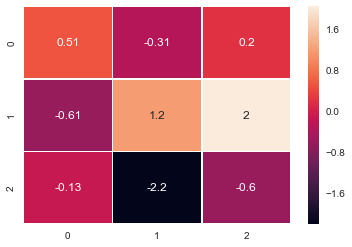

In [116]:
ax=sns.heatmap(data,annot=True,linewidth=.5)
#linewidth为格子之间的间隙,cmap=指定颜色